In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

In [23]:
X = np.random.choice(np.linspace(0, 20, 10000), size=100, replace=False).reshape(-1, 1)
y = np.sin(X) + np.random.normal(scale=0.3, size=X.shape)

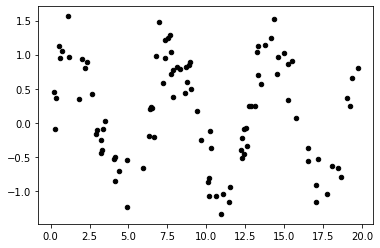

In [24]:
plt.scatter(X, y, c='k', s=20)
plt.show()

In [29]:
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [30]:
model.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

In [31]:
X_grid = np.linspace(0, 20, 100)
y_pred, sigma = model.predict(X_grid.reshape(-1, 1), return_std=True)
y_pred = y_pred.ravel()
sigma = sigma.ravel()

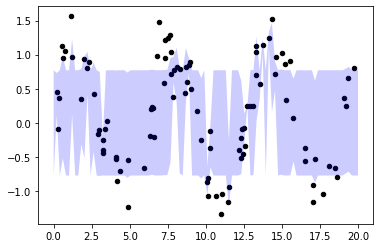

In [32]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X, y, c='k', s=20)
ax.fill_between(
    X_grid,
    y_pred-sigma,
    y_pred+sigma,
    alpha=0.2, fc='b'
)
plt.show()